**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 2**
Pandas para el análisis de datos en Python

---

*   NOMBRE: FERNANDO ABEL LEAL VILLAVICENCIO
*   MATRÍCULA: A01796859


---

En esta actividad usarás el archivo de datos `LaqnData.csv`. Cada fila de este conjunto de datos muestra un registro de medición, por hora, de uno de los siguientes cinco contaminantes del aire:

*   `NO` (óxido nítrico)
*   `NO2` (dióxido de nitrógeno)
*   `NOX` (óxidos nitrosos)
*   `PM10` (partículas suspendidas con un diámetro aerodinámico igual o menor a 10 micrómetros)
*   `PM2.5` (partículas suspendidas con un diámetro aerodinámico igual o menor a 2.5 micrómetros)

Los datos se recopilaron en una ubicación de Londres durante todo el año 2017.

**NOTA IMPORTANTE:** Asegúrate de responder *explícitamente* todos los cuestionamientos.


1.	Descarga el archivo: `LaqnData.csv` y guarda, en un dataframe (`air_df`), todos sus registros.
*   Observa la estructura y contenido del dataframe con los atributos y métodos estudiados (`shape`, `columns`, `head()`, `tail()`, `dtypes`)
*   Calcula el porcentaje de valores faltantes por columna.

Podemos usar el método `info()` para obtener un resumen general del DataFrame, incluyendo el número de filas, columnas y tipos de datos.

In [22]:
import pandas as pd
air_df=pd.read_csv("LaqnData.csv")
air_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43800 entries, 0 to 43799
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Site                     43800 non-null  object 
 1   Species                  43800 non-null  object 
 2   ReadingDateTime          43800 non-null  object 
 3   Value                    40570 non-null  float64
 4   Units                    43800 non-null  object 
 5   Provisional or Ratified  43800 non-null  object 
dtypes: float64(1), object(5)
memory usage: 2.0+ MB


In [23]:
print(air_df.shape)
print(air_df.columns)
print(air_df.dtypes)

(43800, 6)
Index(['Site', 'Species', 'ReadingDateTime', 'Value', 'Units',
       'Provisional or Ratified'],
      dtype='object')
Site                        object
Species                     object
ReadingDateTime             object
Value                      float64
Units                       object
Provisional or Ratified     object
dtype: object


Como se puede observare el uso del método `.info()` simplifica el uso los atributos `shape`, `columns` y `dtypes`. Adicionalmente proporciona mayor información.

In [24]:
air_df.head()

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
0,CT3,NO,01/01/2017 00:00,3.5,ug m-3,R
1,CT3,NO,01/01/2017 01:00,3.6,ug m-3,R
2,CT3,NO,01/01/2017 02:00,2.2,ug m-3,R
3,CT3,NO,01/01/2017 03:00,2.1,ug m-3,R
4,CT3,NO,01/01/2017 04:00,3.3,ug m-3,R


In [25]:
air_df.tail()

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
43795,CT3,PM2.5,31/12/2017 19:00,-2.0,ug m-3,R
43796,CT3,PM2.5,31/12/2017 20:00,6.0,ug m-3,R
43797,CT3,PM2.5,31/12/2017 21:00,5.0,ug m-3,R
43798,CT3,PM2.5,31/12/2017 22:00,5.0,ug m-3,R
43799,CT3,PM2.5,31/12/2017 23:00,6.0,ug m-3,R


De acuerdo la información obtenida se puede observar que la columna `Value` valores nulos sabiendo que tenemos un total de 43800 registros y que dicha columna tiene un total de 40570 valores no nulos esto nos da un total de 3230 valores nulos. también podemos ver que la columna `ReadingDateTime` maneja un tipo de dato no temporal el cual podría dificultar el análisis.

Para observar de mejor manera la cantidad de datos nulos mediante pandas es posible hacer uso del método `isnull()` o `isna()`. En pandas, `isnull()` e `isna()` son exactamente lo mismo. Ambas métodos son similares entre sí, lo que significa que tienen el mismo propósito, funcionalidad y comportamiento.


In [26]:
# df.isnull(): Devuelve un DataFrame booleano donde cada celda es True si el valor es nulo y False si no lo es.
# .mean(): Calcula el promedio por columna. 
# # * 100: Convierte la proporción a porcentaje.

air_df.isnull().mean() * 100

Site                       0.000000
Species                    0.000000
ReadingDateTime            0.000000
Value                      7.374429
Units                      0.000000
Provisional or Ratified    0.000000
dtype: float64

In [27]:
air_df.isna().mean() * 100

Site                       0.000000
Species                    0.000000
ReadingDateTime            0.000000
Value                      7.374429
Units                      0.000000
Provisional or Ratified    0.000000
dtype: float64

Como se puede observar `ambas` métodos funcionan de la misma manera por lo cual el resultado es el mismo.

De esta manera observamos que únicamente en la columna `Value` tenemos que un 7.37% son valores faltantes y el otro 92.63% son celdas que contienen un dato numérico decimal.

2.	Obtén la cantidad de valores únicos por columna (`nunique()`) para responder:


*   ¿Cuántas mediciones se hicieron?
*   ¿Cuántos contaminantes del aire (`Species`) se analizaron?
*   ¿Qué columnas no agregan ningún valor informativo porque el mismo valor en todo el conjunto de datos? Elimínalas del dataframe.
*   La columna `Units` tampoco posee valor informativo. Verifícalo con la función `unique()` y elimínala del dataframe.

In [28]:
air_df.nunique()


Site                          1
Species                       5
ReadingDateTime            8760
Value                      1847
Units                         3
Provisional or Ratified       1
dtype: int64

Con base en la información obtenida, se analizaron cinco tipos de contaminantes del aire, adicionalmente se puede observar que la columna ``ReadingDateTime`` contiene ``8760`` registros, lo que indica que se realizaron ``8760 mediciones para cada uno de los cinco contaminantes``.

Las columnas representadas por el valor ``1`` indican que el mismo valor se repite a lo largo de los ``43,800`` registros. En este sentido, para la columna ``Site``, se puede concluir que se está analizando una única ubicación, mientras que en la columna `Provisional or Ratified` se maneja una única referencia. Dado que estos valores no varían, no aportan información relevante al análisis.

Además, dado que las columnas ``Species`` y `Units` presentan pocos valores únicos, se puede verificar más fácilmente si estos datos están siendo afectados por la falta de limpieza dentro del DataFrame.




In [29]:
print(air_df['Species'].unique())
print(air_df['Units'].unique())

['NO' 'NO2' 'NOX' 'PM10' 'PM2.5']
['ug m-3' 'ug m-3 as NO2' 'ug/m3']


Se puede observar que la columna `Species` corresponde a los cinco tipos diferentes de contaminantes que se están analizando. Sin embargo, la columna `Units` contiene caracteres adicionales, aunque representa un único valor, lo que hace que, por sí sola, no aporte información relevante al análisis. De manera similar, las columnas `Site` y `Provisional or Ratified` tampoco brindan valor significativo debido a su falta de variabilidad, por lo que podrían eliminarse sin afectar el análisis.

Para eliminar las columnas que no aportan un valor informativo podemos simplemente usar el método `drop()` de la siguiente manera para las columnas `Site`, `Units` y `Provisional or Ratified`:  

In [30]:
air_df = air_df.drop(['Site', 'Units', 'Provisional or Ratified'], axis=1)
air_df

,Species,ReadingDateTime,Value
0,NO,01/01/2017 00:00,3.5
1,NO,01/01/2017 01:00,3.6
2,NO,01/01/2017 02:00,2.2
3,NO,01/01/2017 03:00,2.1
4,NO,01/01/2017 04:00,3.3
...,...,...,...
43795,PM2.5,31/12/2017 19:00,-2.0
43796,PM2.5,31/12/2017 20:00,6.0
43797,PM2.5,31/12/2017 21:00,5.0
43798,PM2.5,31/12/2017 22:00,5.0


3.	Realiza el conteo de valores por categoría (`value_counts()`) para la columna `Species` y determina si las lecturas de cada contaminante coincide con el total de mediciones.

In [31]:
air_df['Species'].value_counts()

Species
NO       8760
NO2      8760
NOX      8760
PM10     8760
PM2.5    8760
Name: count, dtype: int64

De acuerdo a la información obtenida por el método `value_counts()` tenemos que cada uno de los 5 contaminantes del aire tiene 8760 lecturas, si sumamos este calor tenemos el total de registro 43800, con lo cual podemos confirmar este valor obtenido concuerda con el total de mediciones

4.	Utiliza la función `groupby()` para determinar el promedio del valor por contaminante.

Otra forma eficaz de obtener información de adicional de los datos es el uso del método `groupby()`. Esta método permite agrupar los datos según valores similares y generar estadísticas agregadas relacionadas con esos grupos.

Algunas funciones comunes que se utilizan después de una del método `groupby` incluyen:

    1. mean
    2. median
    3. count
    4. sum

Consideremos entonces que queríamos agrupar el número de contaminantes y luego obtener el valor promedio para cada contaminante.    

In [32]:
air_df.groupby(by='Species')['Value'].mean()

Species
NO       15.045115
NO2      38.010185
NOX      61.078661
PM10     22.551704
PM2.5    14.999831
Name: Value, dtype: float64

5.	El conjunto de datos está en un formato largo. Aplique la función apropiada para cambiarlo al formato ancho (`ReadingDateTime` como índice y cada contaminante en una columna). Nombre el dataframe resultante como `pvt_df`.

Para realizar un redimensionamiento del DataFrame es decir transformar filas por columnas se tiene que hacer uso del método `pivot()` el cual es útil cuando tienes datos en formato largo (es decir, con muchas filas) y deseas convertirlo a un formato más ancho, donde cada valor único de una columna se convierte en una columna separada.

In [33]:
pvt_df=air_df.pivot(index='ReadingDateTime', columns='Species', values='Value')
pvt_df

Species,NO,NO2,NOX,PM10,PM2.5
ReadingDateTime,,,,,
01/01/2017 00:00,3.5,30.8,36.2,35.7,NaN
01/01/2017 01:00,3.6,31.5,37.0,28.5,NaN
01/01/2017 02:00,2.2,27.3,30.7,22.7,NaN
01/01/2017 03:00,2.1,23.5,26.8,20.5,NaN
01/01/2017 04:00,3.3,28.0,33.0,22.1,NaN
...,...,...,...,...,...
31/12/2017 19:00,0.7,17.5,18.5,16.3,-2.0
31/12/2017 20:00,0.7,17.5,18.6,14.5,6.0
31/12/2017 21:00,0.7,14.1,15.1,8.6,5.0


De esta manera `index='ReadingDateTime'`: Las fechas ahora se usan como índices en el nuevo DataFrame.

`columns='Species'`: Los valores se convierten en columnas.

6.	A través de la función `describe()` responde:

*   ¿Cuál es el mayor valor de `NO2` registrado? ¿A qué día pertenece?
*   ¿Cuál es el menor valor de `PM10` registrado?¿A qué día pertenece?
*   ¿Cuál es la mediana del `NO`? ¿Cómo se interpreta?
*   ¿Cuál es el primer cuartil de `PM2.5`? ¿Qué significa?

In [34]:
print(pvt_df['NO2'].describe())
pvt_df['NO2'].idxmax()

count    8660.000000
mean       38.010185
std        18.580841
min         2.800000
25%        23.800000
50%        35.300000
75%        49.900000
max       120.200000
Name: NO2, dtype: float64


'24/01/2017 19:00'

De acuerdo a la descripción obtenida el valor máximo para la columna `NO2` es `120.2` que corresponde a una medición tomada el `24/01/2017` a las `19:00`. Dado que la fecha se convirtió en el nuevo índice para el DataFrame `pvt_df` es posible usar el método `idxmax()` para obtener el índice del valor máximo y luego acceder a esa fila específica

In [35]:
print(pvt_df['PM10'].describe())
pvt_df['PM10'].idxmin()

count    8657.000000
mean       22.551704
std        15.344755
min        -5.600000
25%        13.900000
50%        19.500000
75%        27.300000
max       633.099980
Name: PM10, dtype: float64


'12/09/2017 23:00'

Siguiendo la estructura de la pregunta anterior podemos obtener entonces el mínimo valor de la columna `PM10`, por lo tanto, el valor mínimo para dicha columna resulta `-5.6` cuya medición fue tomada el `12/09/2017` a las `23:00`.

In [36]:
print(pvt_df['NO'].describe())

count    8660.000000
mean       15.045115
std        26.678565
min        -2.000000
25%         3.100000
50%         7.100000
75%        15.500000
max       401.799990
Name: NO, dtype: float64


Para determinar cuál es la mediana de la columna `NO` hay que recordar que la mediana es el valor medio dentro de un conjunto de datos por lo cual al usar del método `describe()`, este valor se ve representado como el `50%` por lo que el valor de la mediana es `7.1`. Esto indica que los datos se ven influenciados principalmente por valores más bajos, ya que la media `15.05` lo cual es poco más del doble de la mediana. Esto puede sugerir que hay algunos valores extremos más altos que están influyendo en la media.

In [37]:
print(pvt_df['PM2.5'].describe())

count    5933.000000
mean       14.999831
std        13.558588
min        -8.000000
25%         7.000000
50%        11.000000
75%        18.000000
max       128.000000
Name: PM2.5, dtype: float64


Para la columna `PM2.5` el primer cuartil está representado por el 25% el cual es igual `7` es decir que al menos el 25% de los datos se encuentran en 0 y 7.

7.	Dibuja un histograma para cada columna de `pvt_df`. ¿Qué contaminante tiene mayor variabilidad?

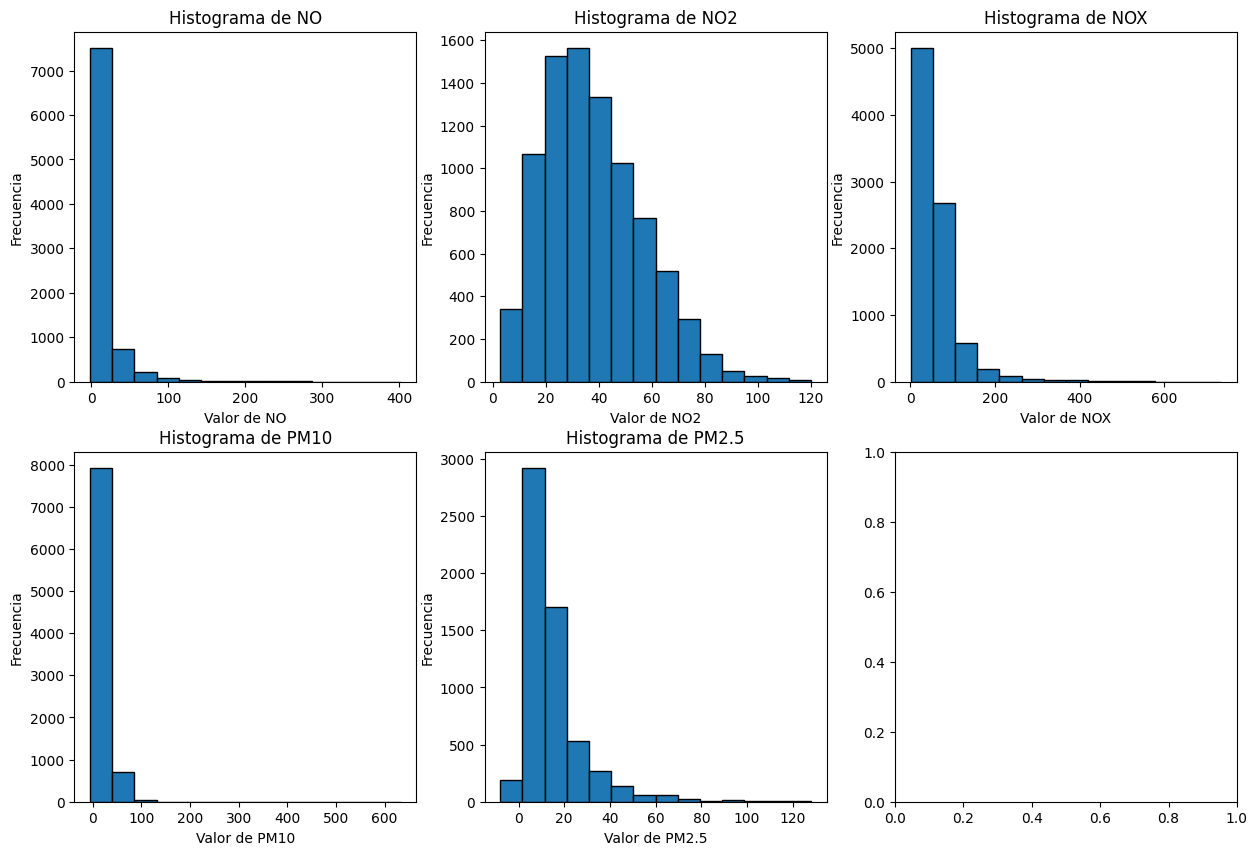

In [38]:
import matplotlib.pyplot as plt

# Crear una figura con 2 filas y 3 columnas (ajustar según la cantidad de gráficos)
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # Ajustar el tamaño según sea necesario

# Gráfico 1: NO
pvt_df['NO'].plot.hist(bins=14, edgecolor='black', ax=axes[0, 0])
axes[0, 0].set_title('Histograma de NO')
axes[0, 0].set_xlabel('Valor de NO')
axes[0, 0].set_ylabel('Frecuencia')

# Gráfico 2: NO2
pvt_df['NO2'].plot.hist(bins=14, edgecolor='black', ax=axes[0, 1])
axes[0, 1].set_title('Histograma de NO2')
axes[0, 1].set_xlabel('Valor de NO2')
axes[0, 1].set_ylabel('Frecuencia')

# Gráfico 3: NOX
pvt_df['NOX'].plot.hist(bins=14, edgecolor='black', ax=axes[0, 2])
axes[0, 2].set_title('Histograma de NOX')
axes[0, 2].set_xlabel('Valor de NOX')
axes[0, 2].set_ylabel('Frecuencia')

# Gráfico 4: PM10
pvt_df['PM10'].plot.hist(bins=14, edgecolor='black', ax=axes[1, 0])
axes[1, 0].set_title('Histograma de PM10')
axes[1, 0].set_xlabel('Valor de PM10')
axes[1, 0].set_ylabel('Frecuencia')

# Gráfico 5: PM2.5
pvt_df['PM2.5'].plot.hist(bins=14, edgecolor='black', ax=axes[1, 1])
axes[1, 1].set_title('Histograma de PM2.5')
axes[1, 1].set_xlabel('Valor de PM2.5')
axes[1, 1].set_ylabel('Frecuencia')


plt.show()



Analizando cada uno de los histogramas, el histograma de `NOX` muestra una mayor extensión del rango de datos, llegando hasta valores superiores a 600. Esto sugiere que hay una mayor variabilidad en los datos de esta columna, ya que los valores están más dispersos en comparación con las demás variables. Los demás histogramas, como `NO`, `NO2`, `PM10`, y `PM2.5`, tienen distribuciones más concentradas hacia valores más bajos, lo que indica menor variabilidad en comparación con `NOX`.

8.	Ejecuta el siguiente código y comenta qué hace cada línea:

In [39]:
# Se define una nueva variable datetime_df para almacenar el nuevo DataFrame 
# "ReadingDateTime" señala la columna que se quiere trabajar dentro del DataFrame "air_df"
# ".str" especifica que la columna selecionada opera únicamente con cadenas de texto
# la función “.plit(' ',expand=True)” señala que divide la cadena en todas las ocurrencias del carácter ' '.
datetime_df = air_df.ReadingDateTime.str.split(' ',expand=True) 
# "".columns['Date','Time']"" indica que se asignan nuevos nombres a las columnas generadas tras dividir la cadena.
datetime_df.columns = ['Date','Time']
datetime_df # Muestra el nuevo DataFrame 

# De la nueva columna "Date" esta se va dividir cada que encuentra un "/" dentro de la cadena de texto
# esto se almacena en el nuevo DataFrame "date_df"
date_df = datetime_df.Date.str.split('/',expand=True)
date_df.columns = ['Day','Month','Year'] # Renombramos las columnas de texto generadas
date_df # Mostramos el nuevo DF

# Con el uso de "join()"", agregamos las columnas del DataFrame “date_df” al DataFrame “air_df”, 
# alineándolas por su índice. Al usar “datetime_df.Time” agregamos la columna llamada “Time” del 
# DataFrame “datetime_df” a “air_df”.
# Con la función “.drop(columns=['ReadingDateTime', 'Year'])” eliminamos las 
# columnas especificadas del DataFrame en este caso, elimina las columnas “ReadingDateTime” y “Year” de “air_df”.
air_df = air_df.join(date_df).join(datetime_df.Time).drop(columns=['ReadingDateTime','Year'])

# Establecemos un nuevo indicejerarquico para trabajar con subconjuntos de datos
air_df = air_df.set_index(['Month','Day','Time','Species'])
air_df # Mostramos el nuevo DF

Value
Month Day Time  Species       
01    01  00:00 NO         3.5
          01:00 NO         3.6
          02:00 NO         2.2
          03:00 NO         2.1
          04:00 NO         3.3
...                        ...
12    31  19:00 PM2.5     -2.0
          20:00 PM2.5      6.0
          21:00 PM2.5      5.0
          22:00 PM2.5      5.0
          23:00 PM2.5      6.0

[43800 rows x 1 columns]

9. Ejecuta la siguiente instrucción y compara su salida con la del código anterior (ejercicio 8). ¿Son iguales?

In [40]:
air_df.unstack()

Value                        
Species            NO   NO2   NOX  PM10 PM2.5
Month Day Time                               
01    01  00:00   3.5  30.8  36.2  35.7   NaN
          01:00   3.6  31.5  37.0  28.5   NaN
          02:00   2.2  27.3  30.7  22.7   NaN
          03:00   2.1  23.5  26.8  20.5   NaN
          04:00   3.3  28.0  33.0  22.1   NaN
...               ...   ...   ...   ...   ...
12    31  19:00   0.7  17.5  18.5  16.3  -2.0
          20:00   0.7  17.5  18.6  14.5   6.0
          21:00   0.7  14.1  15.1   8.6   5.0
          22:00   1.1  22.0  23.6  12.5   5.0
          23:00   0.9  19.4  20.7  10.4   6.0

[8760 rows x 5 columns]

Dado que el método `.unstack()` requiere de manera obligatoria trabajar con un DataFrame con índice jerárquico desde un inicio podríamos concluir en este punto que el resultado obtenido en el ejercicio anterior no es igual a este nuevo output. 
Debido a que se requiere de un DataFrame jerárquico desde un inicio, adicionalmente el DataFrame "air_df" ya había sido sustituido con base en las instrucciones del código anterior.
De igual manera el método `.unstack()` transforma los índices jerárquicos en columnas para facilitar el análisis.

10.	Explica cuáles son las diferencias y similitudes entre el par `melt()/pivot()` y el par `stack()/unstack()`. Si tuvieras que elegir una contraparte para `melt()` entre `stack()/unstack()`, ¿cuál elegirías? ¿Por qué?

## Similitudes y diferencias entre `melt()` y `pivot()`:




Similitudes:
1.	En `melt()`, necesitas especificar las columnas identificadoras (id_vars) donde (id_vars) es igual a la columna que no se quiere cambiar.

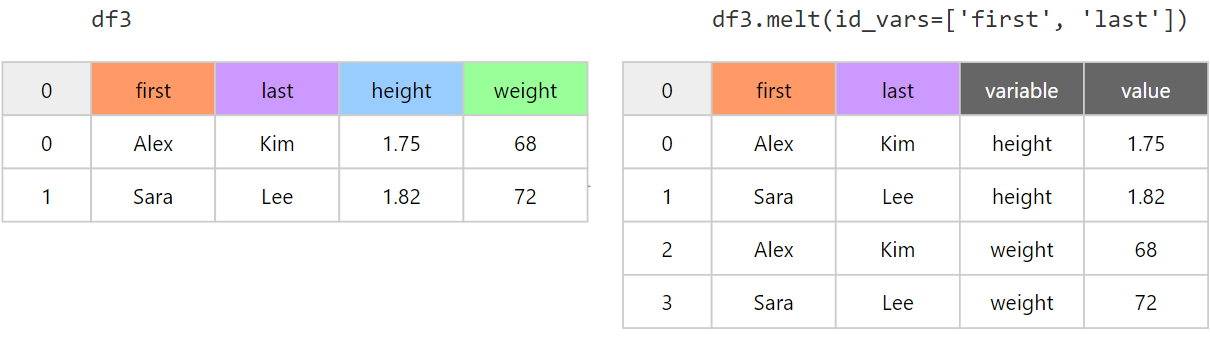

2.	En `pivot()`, debes proporcionar las columnas para formar el índice, las columnas pivotadas y los valores.

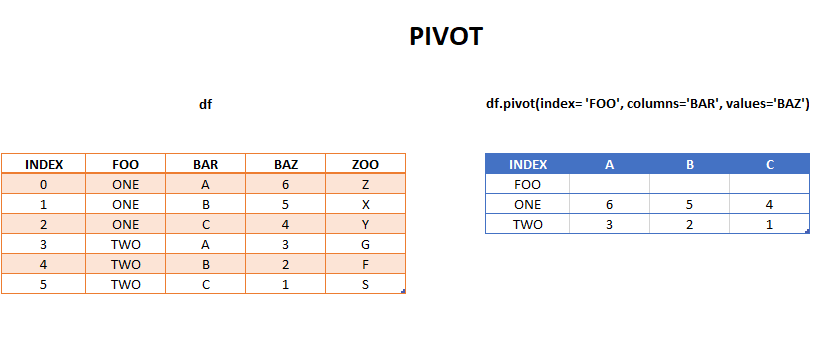

Diferencias:
1.	`melt()` convierte un DataFrame de formato "ancho" (con muchas columnas) a formato "largo" (con menos columnas y más filas).
2.	`pivot()` convierte un DataFrame de formato "largo" a formato "ancho" (más columnas y menos filas).
3.	`melt()` no depende de un índice jerárquico; funciona con las columnas directamente.
4.	`pivot()` crea un índice jerárquico automáticamente si los valores no son únicos.


## Similitudes y diferencias entre `stack()` y `unstack()`

Similitudes:
1.	Ambos métodos transforman datos basándose en índices jerárquicos (MultiIndex).
2.	Tanto `stack()` como `unstack()` afectan las columnas de un DataFrame, moviendo los valores de una columna o índice a otro.
3.	Similar a `melt()` y `pivot()`, `stack()` y `unstack()` también convierten entre formatos "largo" y "ancho".


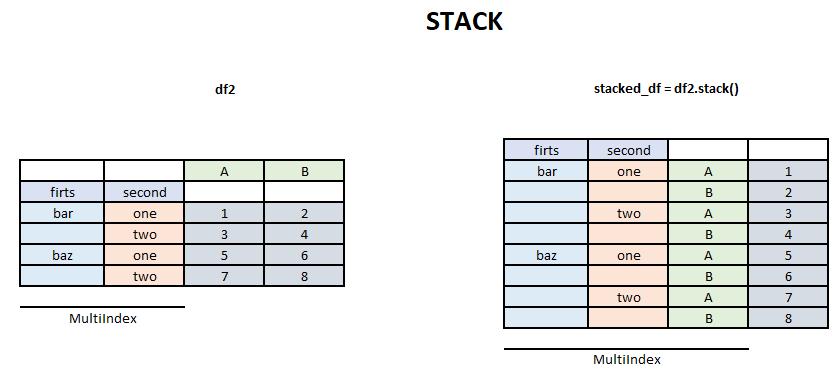

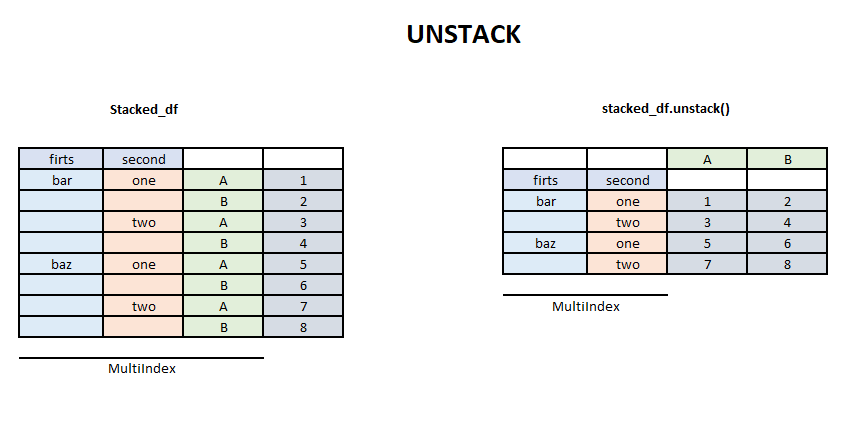

Diferencias:

1.	`stack()`: Convierte las columnas de un DataFrame en un índice de nivel más bajo. "Apila" las columnas, moviéndolas al índice. Esto significa que se transforma el DataFrame en una estructura más "larga" con más niveles de índice.
2.  `unstack()`: Es lo opuesto a `stack()`. Convierte el índice de nivel bajo en columnas. "Desapila" el índice, moviéndolo a columnas. Esto resulta en un DataFrame más "ancho" con menos niveles de índice.


## Conclusión:

La selección entre estos métodos depende de la estructura de los datos con los que se esté trabajando. Mientras que métodos como `melt()` y `pivot()` se enfocan en cambiar entre formatos largos y anchos, y `stack()` y `unstack()` manipulan el índice jerárquico de un DataFrame, cada uno de estos transforma los datos de manera diferente, abriendo puertas a distintos tipos de análisis.

Dado que `stack()` y `unstack()` son operaciones inversas, es decir, mientras que `stack()` convierte los datos de formato ancho a largo, `unstack()` los convierte de largo a ancho, no sería adecuado elegir uno como contraparte directa del método `melt()`. Cada uno de estos métodos tiene un propósito específico: `stack()` y `unstack()` están diseñados para manipular la estructura del índice, mientras que `melt()` transforma el formato del DataFrame. La elección entre estos métodos depende de los objetivos del análisis y de la estructura de los datos con los que se esté trabajando

